### Time Value of Money Calculator 
TVM Calculations
 -Future Value (lump sum & annuity)
- Present Value (lump sum & annuity)
- Payment calculations
- Interest rate and period calculations


In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


--------------------------------------------------------------------------------
Compound Growth
Investing $10,000 at 10% annual interest for 20 years

--------------------------------------------------------------------------------


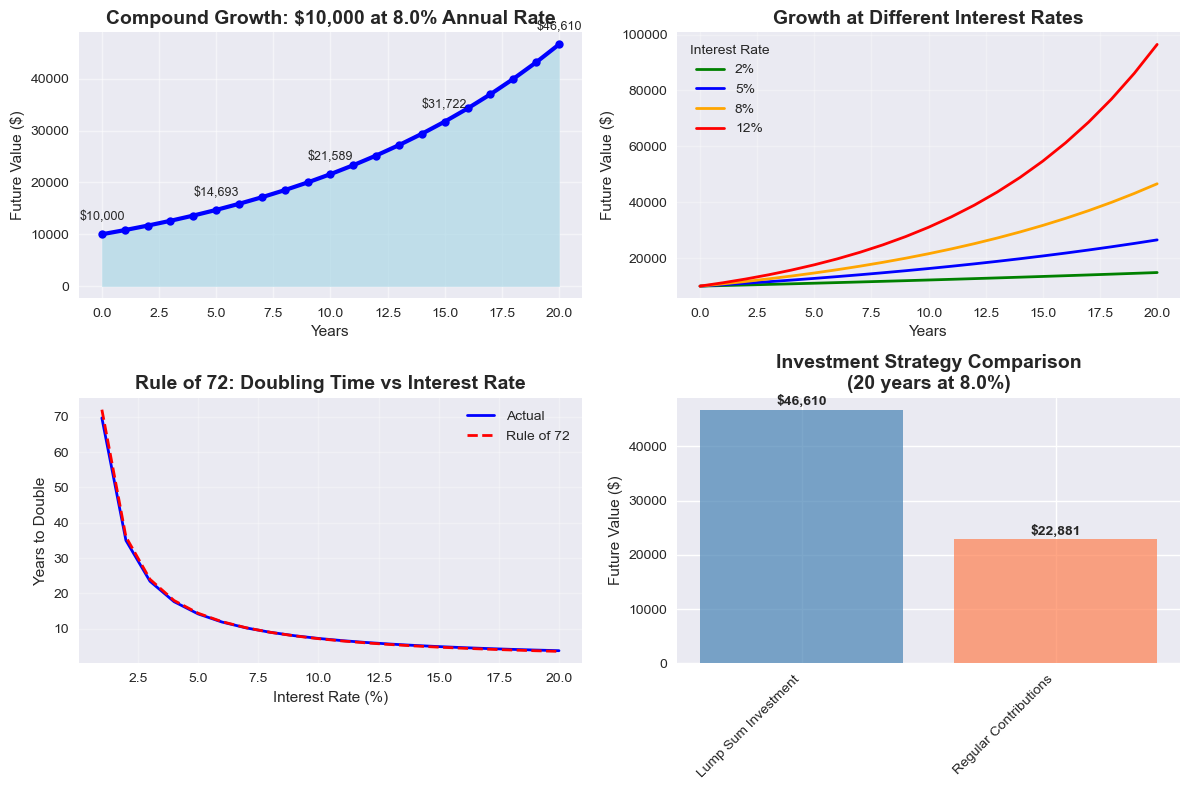

In [18]:
def create_growth_visualization(pv, rate, max_periods=20):
    periods = np.arange(0, max_periods + 1)
    values = pv * (1 + rate) ** periods
    
    plt.figure(figsize=(12, 8))
    
    # Main growth chart
    plt.subplot(2, 2, 1)
    plt.plot(periods, values, 'b-', linewidth=3, marker='o', markersize=6)
    plt.fill_between(periods, values, alpha=0.7, color='lightblue')
    plt.title(f'Compound Growth: ${pv:,.0f} at {rate:.1%} Annual Rate', 
             fontsize=14, fontweight='bold')
    plt.xlabel('Years')
    plt.ylabel('Future Value ($)')
    plt.grid(True, alpha=0.5)
    
    for year in [0, 5, 10, 15, 20]:
        if year <= max_periods:
            plt.annotate(f'${values[year]:,.0f}', 
                       (year, values[year]), 
                       textcoords="offset points", 
                       xytext=(0,10), 
                       ha='center',
                       fontsize=9)
    
    plt.subplot(2, 2, 2)
    rates = [0.02, 0.05, 0.08, 0.12]
    colors = ['green', 'blue', 'orange', 'red']
    for i, r in enumerate(rates):
        values_r = pv * (1 + r) ** periods
        plt.plot(periods, values_r, color=colors[i], 
                label=f'{r:.0%}', linewidth=2)
    
    plt.title('Growth at Different Interest Rates', fontsize=14, fontweight='bold')
    plt.xlabel('Years')
    plt.ylabel('Future Value ($)')
    plt.legend(title='Interest Rate')
    plt.grid(True, alpha=0.3)
    
    # Rule of 72 visualization
    plt.subplot(2, 2, 3)
    rates_rule72 = np.linspace(0.01, 0.20, 20)
    doubling_periods = np.log(2) / np.log(1 + rates_rule72)
    rule72_approx = 72 / (rates_rule72 * 100)
    
    plt.plot(rates_rule72 * 100, doubling_periods, 'b-', linewidth=2, label='Actual')
    plt.plot(rates_rule72 * 100, rule72_approx, 'r--', linewidth=2, label='Rule of 72')
    plt.title('Rule of 72: Doubling Time vs Interest Rate', fontsize=14, fontweight='bold')
    plt.xlabel('Interest Rate (%)')
    plt.ylabel('Years to Double')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Annuity vs Lump Sum comparison
    plt.subplot(2, 2, 4)
    lump_sum = pv * (1 + rate) ** max_periods
    annuity_pmt = pv / max_periods  
    annuity_fv = annuity_pmt * (((1 + rate) ** max_periods - 1) / rate)
    
    comparison = [lump_sum, annuity_fv]
    labels = ['Lump Sum Investment', 'Regular Contributions']
    colors = ['steelblue', 'coral']
    
    bars = plt.bar(labels, comparison, color=colors, alpha=0.7)
    plt.title(f'Investment Strategy Comparison\n({max_periods} years at {rate:.1%})', 
             fontsize=14, fontweight='bold')
    plt.ylabel('Future Value ($)')
    plt.xticks(rotation=45, ha='right')
    
    # Add value labels on bars
    for bar, value in zip(bars, comparison):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + bar.get_height()*0.01,
                f'${value:,.0f}', ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()

# ------------------------------------------------
print(f"\n{'-'*80}")
print("Compound Growth")
print("Investing $10,000 at 10% annual interest for 20 years")
print(f"\n{'-'*80}")
create_growth_visualization(10000, 0.08, 20)